In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# loading the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()# displays the first 5 rows of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'], inplace=True)

<ipython-input-4-435ab9b6a329>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Attrition'], palette="coolwarm")


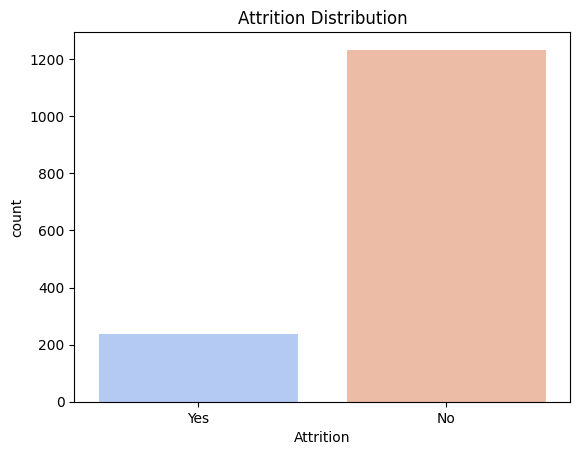

In [4]:
# checking the class imblance of attrition
sns.countplot(x=df['Attrition'], palette="coolwarm")
plt.title('Attrition Distribution')
plt.show()

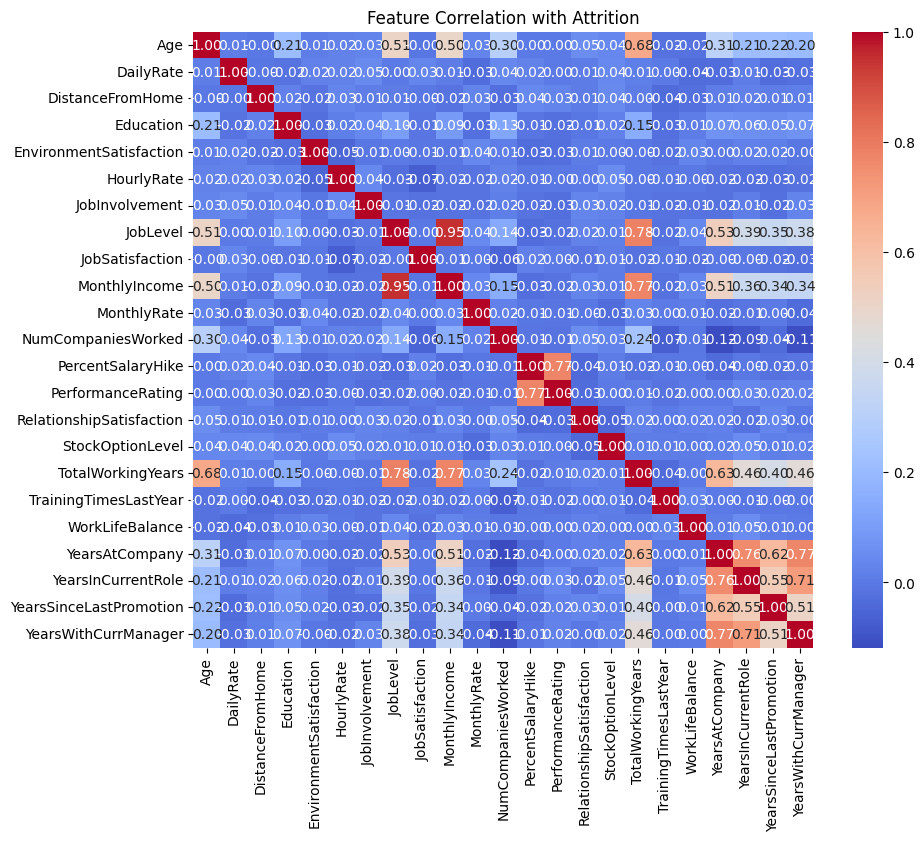

In [5]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Attrition')
plt.show()

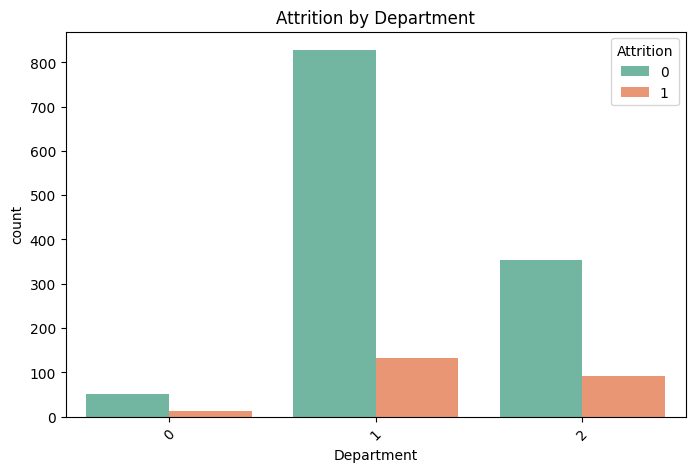

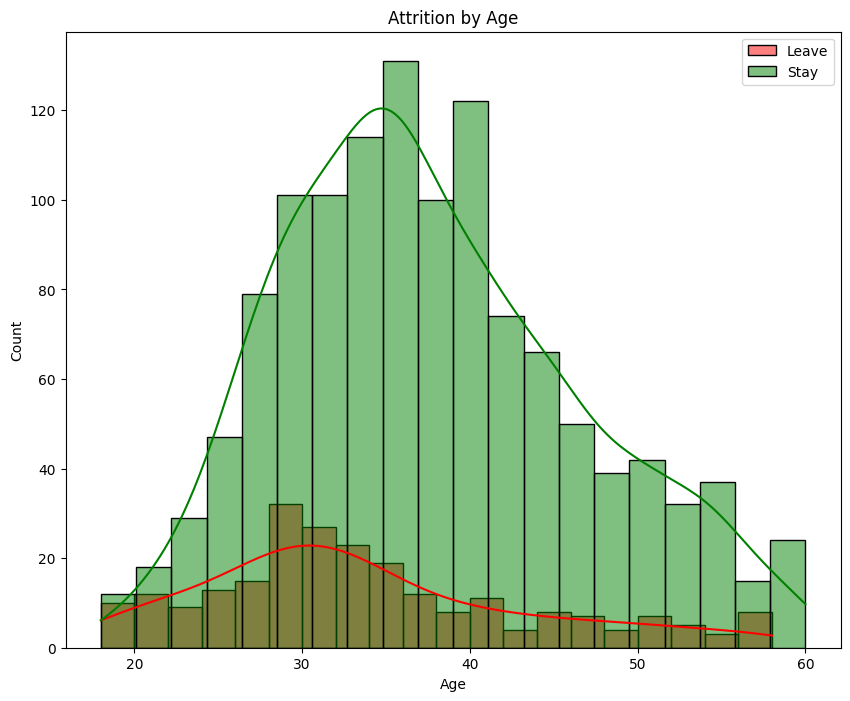

In [22]:
# Attrition by department
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Department'], hue=df['Attrition'], palette="Set2")
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

# Attrition by Age group
plt.figure(figsize=(10, 8))
sns.histplot(df[df["Attrition"] == 1]["Age"], bins=20, kde=True, color="red", label="Leave")
sns.histplot(df[df["Attrition"] == 0]["Age"], bins=20, kde=True, color="green", label="Stay")
plt.title('Attrition by Age')
plt.legend()
plt.show()  # Add parentheses to plt.show


In [9]:
# # encode the cetagorical variables using for loop where object and cetagory data type are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])


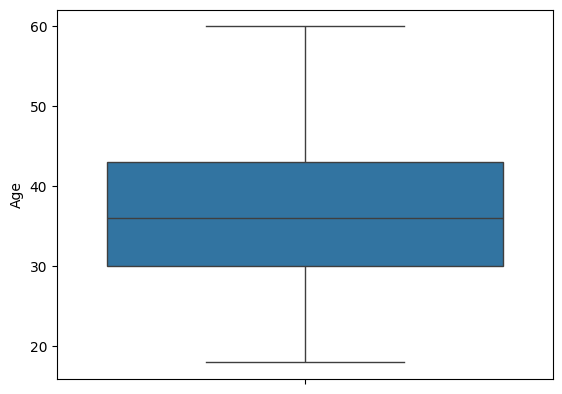

In [10]:
# check the outlier
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Age'])
plt.show()

In [11]:
# x  and y columns
x = df.drop(columns=['Attrition'])
y = df['Attrition']

In [12]:
# train test split the data
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler
# create a MinMaxScaler object
scaler = MinMaxScaler()
# fit and transform the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
# call the model
lr = LogisticRegression(max_iter= 100, random_state=42)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [18]:
# evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.891156462585034
Recall: 0.2564102564102564
[[252   3]
 [ 29  10]]
Precision: 0.7692307692307693
F1 Score: 0.38461538461538464
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       255
           1       0.77      0.26      0.38        39

    accuracy                           0.89       294
   macro avg       0.83      0.62      0.66       294
weighted avg       0.88      0.89      0.87       294

[[252   3]
 [ 29  10]]


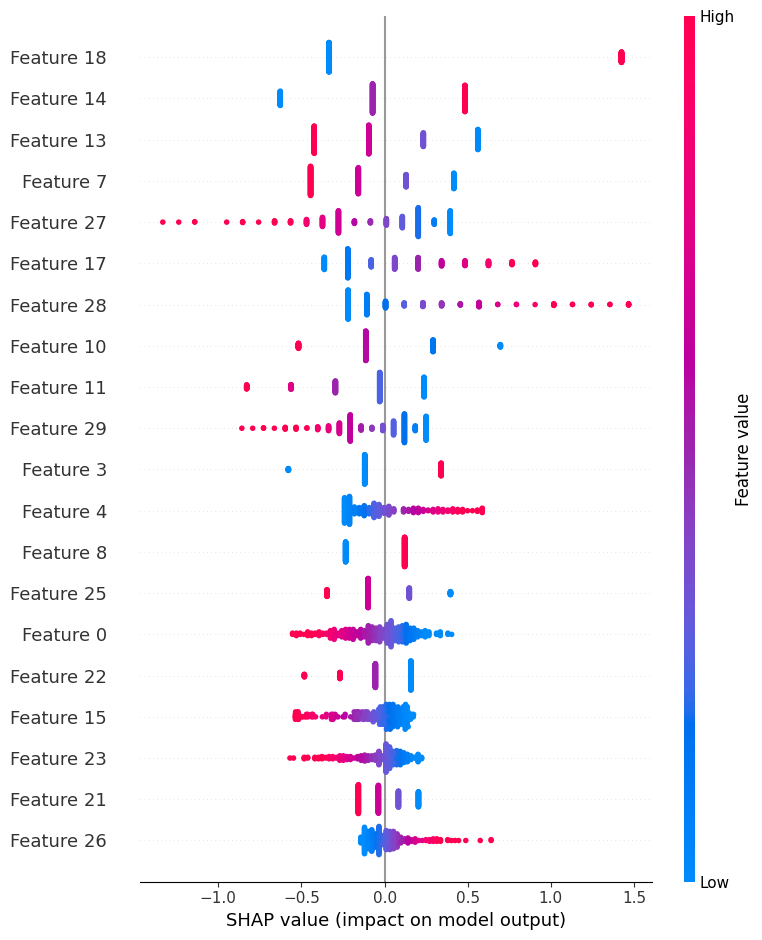

In [21]:
import shap
# SHAP explanation
# Use shap.Explainer or shap.LinearExplainer for Logistic Regression
# shap_explainer = shap.LinearExplainer(lr, x_train) # if you want to use LinearExplainer
shap_explainer = shap.Explainer(lr, x_train) # Use Explainer which automatically selects the best method
shap_values = shap_explainer.shap_values(x_test)

# Select appropriate SHAP values for summary plot
if isinstance(shap_values, list) and len(shap_values) > 1:
    shap_values_to_plot = shap_values[1]  # For binary classification, use SHAP values of class 1
else:
    shap_values_to_plot = shap_values

# Summary plot for class 1
shap.summary_plot(shap_values_to_plot, x_test)